Team Members details 

Member 1 
name : Pavana Lakshmi Venugopal
ubit name : pavanala
UB number : 50464513

Member 2 
name : Varshitha Krishna Reddy
ubit name : vreddy5
UB number : 50471132

**Task 1**
The code maximizes log-likelihood and minimizes the criterion function of negative log probability of training data set by using softmax output nodes and categorical cross-entropy loss as the loss function.

A neural network to maximize the log-likelihood of the label has softmax output nodes, which ensure that the predicted class probabilities are non-negative and sum up to one

softmax (z)i = exp (z)i/ ∑ exp (z)j

In [1]:
#import libraries and load data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(train_X, train_Y), (test_X, test_Y) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
#preprocessing images
train_images = train_X / 255.0
test_images = test_X / 255.0


In [3]:
#converting labels to one-hot encoded vectors
train_labels = keras.utils.to_categorical(train_Y, 10)
test_labels = keras.utils.to_categorical(test_Y, 10)

LeNet-5 CNN architecture is made up of 7 layers. The layer composition consists of 3 convolutional layers, 2 subsampling layers and 2 fully connected layers.

In [4]:
#defining the LeNet-5 architecture
model = keras.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=120, activation='relu'),
    keras.layers.Dense(units=84, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [5]:
#train the model without image augmentation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 21s 6ms/step - loss: 1.6313 - accuracy: 0.4069 - val_loss: 1.4648 - val_accuracy: 0.4696
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3407 - accuracy: 0.5196 - val_loss: 1.3213 - val_accuracy: 0.5344
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2270 - accuracy: 0.5642 - val_loss: 1.2049 - val_accuracy: 0.5717
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1486 - accuracy: 0.5939 - val_loss: 1.1679 - val_accuracy: 0.5864
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0820 - accuracy: 0.6174 - val_loss: 1.1762 - val_accuracy: 0.5835
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0295 - accuracy: 0.6376 - val_loss: 1.1300 - val_accuracy: 0.6018
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9850 - accuracy: 0.6517 - val_loss: 1.1173 - val_accuracy

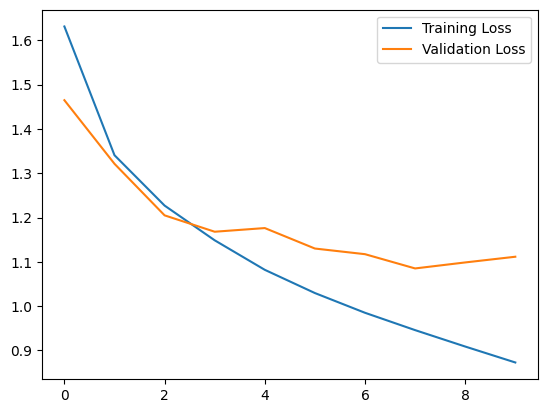

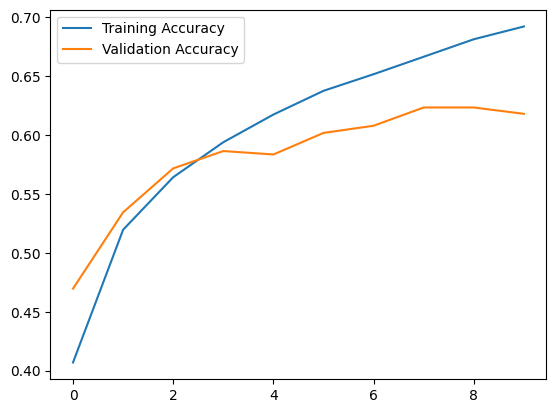

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [7]:
y_pred = model.predict(test_images)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.argmax(test_labels, axis=1)

confusion_mtx = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)
print("confution matrix")
print(confusion_mtx)

313/313 [==============================] - 1s 2ms/step
confution matrix
tf.Tensor(
[[709  20  71  20  36  11  24  17  67  25]
 [ 58 682   4  31  17  17  19  13  44 115]
 [ 52   7 550  80 110  63  70  40  21   7]
 [ 13   9 104 504  83 159  67  28  18  15]
 [ 29   3 123  85 588  52  59  47  10   4]
 [ 13   3  81 250  81 480  27  45  13   7]
 [  7   4  91 104  72  27 671   9   9   6]
 [ 15   2  32  87 127  78  13 626   3  17]
 [105  41  30  34  15  16   8   7 718  26]
 [ 54 110  11  45  10  14  21  34  49 652]], shape=(10, 10), dtype=int32)


313/313 [==============================] - 1s 2ms/step


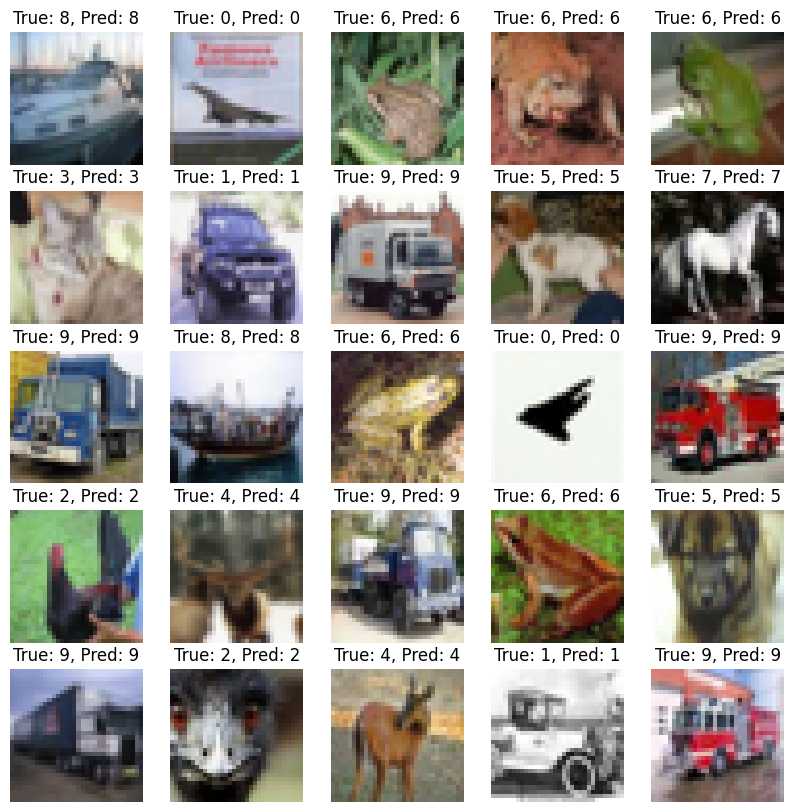

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

y_pred = model.predict(test_images)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.argmax(test_labels, axis=1)

correct_indices = []
incorrect_indices = []

# Find correctly and incorrectly classified images
for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

# Display 25 images (5x5 grid)
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axs.ravel()):
    if i < len(correct_indices):
        idx = correct_indices[i]
        ax.imshow(test_images[idx])
        ax.set_title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    else:
        idx = incorrect_indices[i - len(correct_indices)]
        ax.imshow(test_images[idx])
        ax.set_title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    ax.axis('off')
plt.show()


In [9]:
datagen = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True
)
datagen.fit(train_images)

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=128),
    epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
391/391 [==============================] - 28s 70ms/step - loss: 1.1720 - accuracy: 0.5889 - val_loss: 1.0676 - val_accuracy: 0.6304
Epoch 2/10
391/391 [==============================] - 28s 71ms/step - loss: 1.1430 - accuracy: 0.5966 - val_loss: 1.0852 - val_accuracy: 0.6275
Epoch 3/10
391/391 [==============================] - 27s 70ms/step - loss: 1.1340 - accuracy: 0.5989 - val_loss: 1.0329 - val_accuracy: 0.6421
Epoch 4/10
391/391 [==============================] - 27s 70ms/step - loss: 1.1203 - accuracy: 0.6053 - val_loss: 1.0381 - val_accuracy: 0.6356
Epoch 5/10
391/391 [==============================] - 28s 71ms/step - loss: 1.1163 - accuracy: 0.6066 - val_loss: 1.0160 - val_accuracy: 0.6448
Epoch 6/10
391/391 [==============================] - 28s 72ms/step - loss: 1.0981 - accuracy: 0.6113 - val_loss: 1.0088 - val_accuracy: 0.6429
Epoch 7/10
391/391 [==============================] - 27s 69ms/step - loss: 1.0954 - accuracy: 0.6128 - val_loss: 1.0453 - val_accuracy:

In [10]:
confusion_mtx = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)
print("confution matrix")
print(confusion_mtx)

confution matrix
tf.Tensor(
[[709  20  71  20  36  11  24  17  67  25]
 [ 58 682   4  31  17  17  19  13  44 115]
 [ 52   7 550  80 110  63  70  40  21   7]
 [ 13   9 104 504  83 159  67  28  18  15]
 [ 29   3 123  85 588  52  59  47  10   4]
 [ 13   3  81 250  81 480  27  45  13   7]
 [  7   4  91 104  72  27 671   9   9   6]
 [ 15   2  32  87 127  78  13 626   3  17]
 [105  41  30  34  15  16   8   7 718  26]
 [ 54 110  11  45  10  14  21  34  49 652]], shape=(10, 10), dtype=int32)


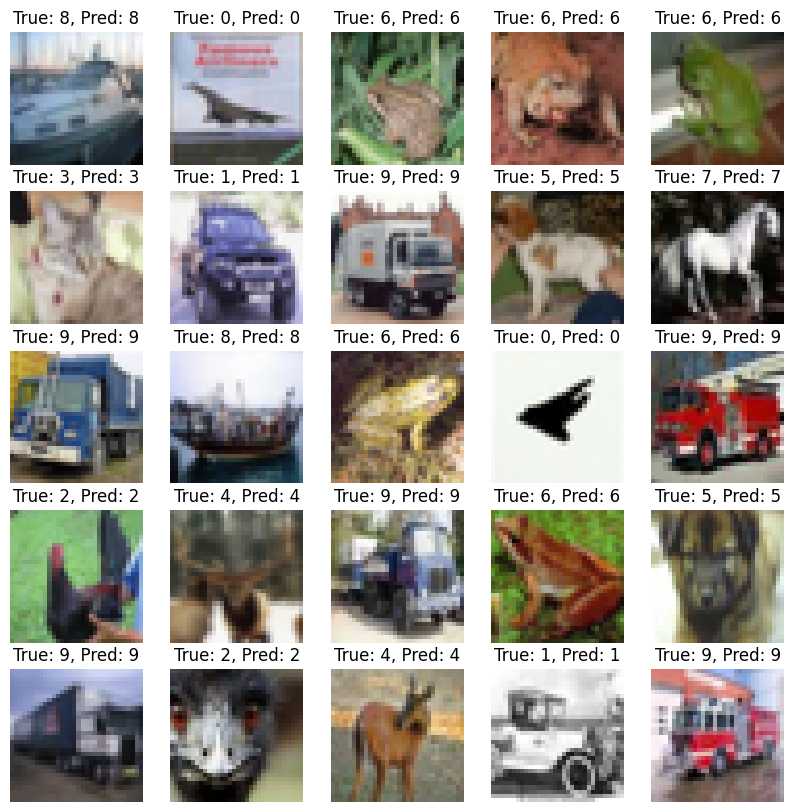

In [11]:
correct_indices = []
incorrect_indices = []

# Find correctly and incorrectly classified images
for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

# Display 25 images (5x5 grid)
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axs.ravel()):
    if i < len(correct_indices):
        idx = correct_indices[i]
        ax.imshow(test_images[idx])
        ax.set_title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    else:
        idx = incorrect_indices[i - len(correct_indices)]
        ax.imshow(test_images[idx])
        ax.set_title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    ax.axis('off')
plt.show()

The best performance we can get on the CIFAR-10 dataset using a LeNet-5 neural network with image augmentation is around 80-85% accuracy, depending on the specific configuration of the network and training parameters.


References : https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48

**Task 2**

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Defining scaling coefficients
ALPHA = 1.2
BETA = 1.1
GAMMA = 1.15
PHI = 1.0

In [14]:
# input shape
INPUT_SHAPE = (32, 32, 3)

def build_efficientnet(input_shape, alpha, beta, gamma, phi):
    """Build EfficientNet model"""
    
    # Base number of filters
    base_filters = 32
    
    # Determine the number of filters required for each block.
    filters = []
    for z in range(5):
        filters.append(int(round(base_filters * beta ** (z / 4))))
    
    # Define input layer
    inputs = Input(shape=input_shape)
    
    # initial series of convolutional layers
    x = Conv2D(int(round(base_filters * alpha)), kernel_size=3, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    
    # Depthwise separable convolutional blocks
    for y in range(5):
        for m in range(3):
            strides = 2 if m == 0 else 1
            x = tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('swish')(x)
            x = Conv2D(int(round(filters[m] * alpha)), kernel_size=1, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('swish')(x)
    
    # Global average pooling and fully connected layers
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(100, activation='softmax')(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

In [15]:
# Building the model using Keras
model = build_efficientnet(INPUT_SHAPE, ALPHA, BETA, GAMMA, PHI)

In [16]:
# model compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Loading the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


<ipython-input-18-fdd298bd208a>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, i+1)
/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


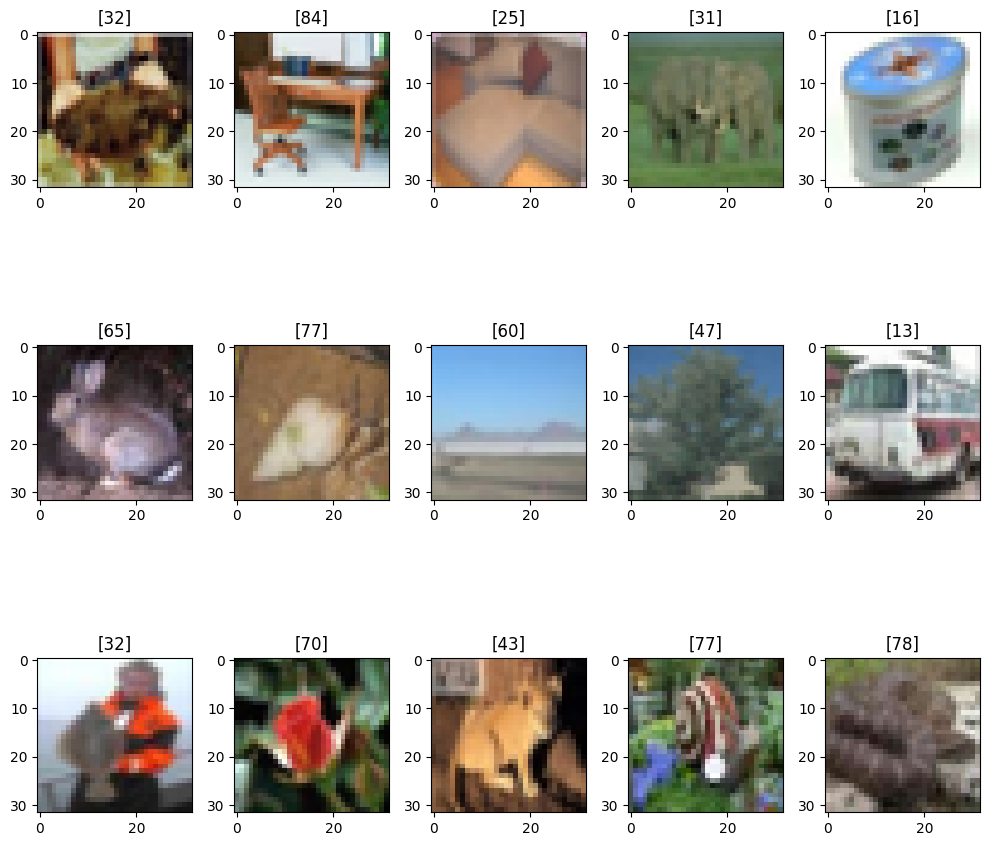

In [18]:
def example(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(15):
        plt.subplot(3, 5, i+1)
        b = np.random.randint(0, data.shape[0])
        plt.imshow(data[b])
        plt.title(labels[b])
    plt.tight_layout()
    plt.show()
  
  
example(x_train, y_train)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 38)        1064      
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 38)       152       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16, 16, 38)        0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 8, 8, 38)         380       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 38)         152   

In [20]:
# Data Pre-processing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

In [21]:
# Data modification
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

In [22]:
# Train the model
model_fit = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 62s 99ms/step - loss: 4.6497 - accuracy: 0.0132 - val_loss: 4.6058 - val_accuracy: 0.0100
Epoch 2/10
391/391 [==============================] - 35s 89ms/step - loss: 4.5246 - accuracy: 0.0216 - val_loss: 4.4752 - val_accuracy: 0.0293
Epoch 3/10
391/391 [==============================] - 36s 93ms/step - loss: 4.3371 - accuracy: 0.0343 - val_loss: 4.2661 - val_accuracy: 0.0392
Epoch 4/10
391/391 [==============================] - 36s 93ms/step - loss: 4.1642 - accuracy: 0.0506 - val_loss: 4.1433 - val_accuracy: 0.0575
Epoch 5/10
391/391 [==============================] - 35s 90ms/step - loss: 4.0525 - accuracy: 0.0647 - val_loss: 3.9891 - val_accuracy: 0.0789
Epoch 6/10
391/391 [==============================] - 35s 90ms/step - loss: 3.9597 - accuracy: 0.0769 - val_loss: 3.8853 - val_accuracy: 0.0901
Epoch 7/10
391/391 [==============================] - 35s 89ms/step - loss: 3.8834 - accuracy: 0.0875 - val_loss: 3.8545 - val_accuracy:

In [23]:
# Model Evaluation
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 3.6906 - accuracy: 0.1183


[3.6906328201293945, 0.11829999834299088]

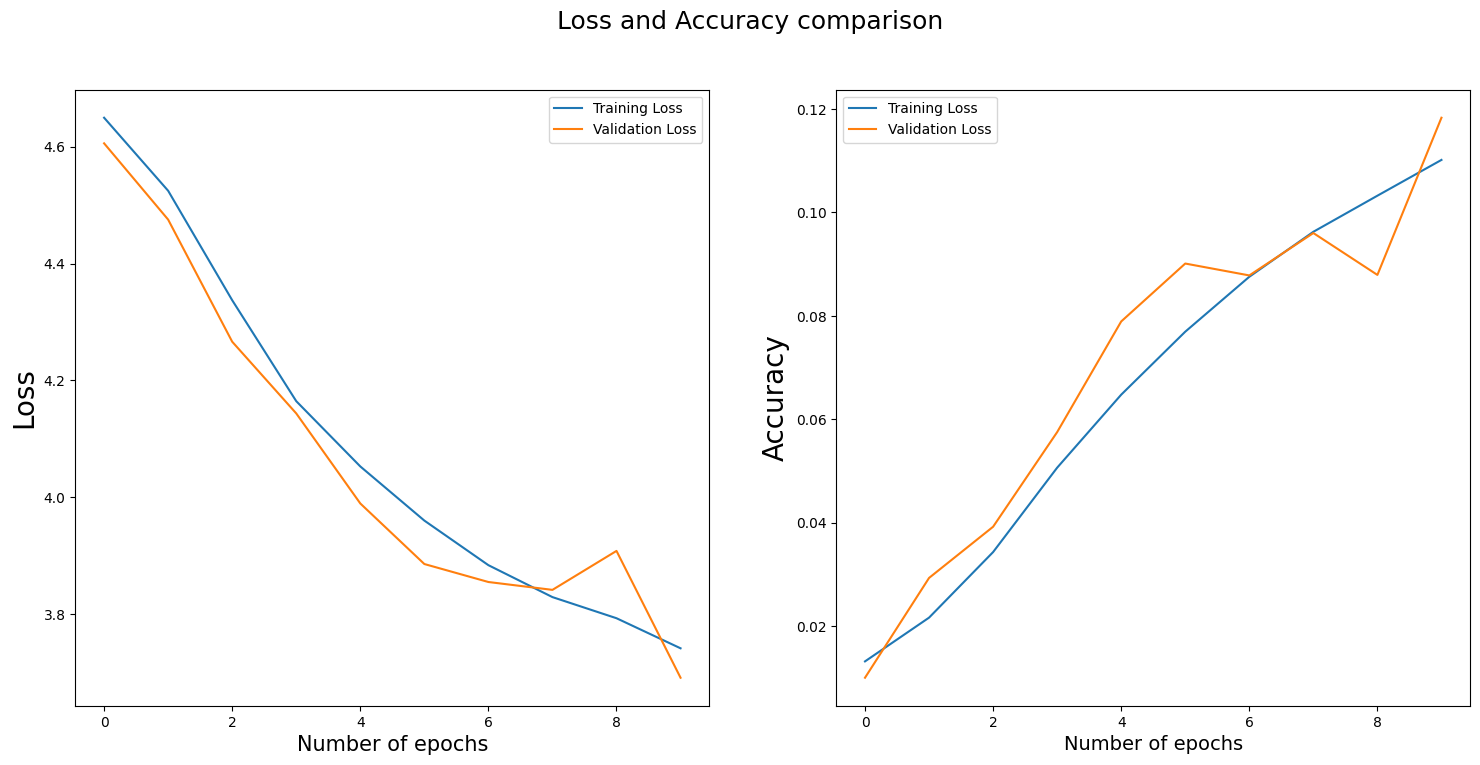

In [24]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy comparison', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=20)

plt.subplot(1,2,2)
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=20)
plt.show()

Building EfficientNet involves a number of techniques, including:
1)The CNN architecture is scaled up by EfficientNet using a compound scaling algorithm in the three dimensions of depth, breadth, and resolution.Three hyperparameters, alpha, beta, and gamma, which affect the number of filters used, the width of the layers used, and the input image resolution, respectively.
2)In order to reduce the amount of parameters and calculations required in the network while retaining high accuracy, EfficientNet employs depthwise separable convolutions.
3)It also uses the Swish activation function, which is a smooth and non-monotonic function that has been shown to outperform other popular activation functions such as ReLU and sigmoid.
4)In order to prevent overfitting, EfficientNet utilizes several methods of regularization including data augmentation and dropout.
5)An Efficient Channel Attention (ECA) module is employed by EfficientNet to capture interdependencies among various feature channels in a layer. This mechanism is lightweight and efficient.

Validation accuracy is 12.79%

**Task 3**